In [889]:
images = r'C:\Users\akand\Downloads\images\\'

#### Reading the csv file to know the location of features

In [890]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = pd.read_csv('gt.csv')
file

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,00000.jpg,51,51,127,60,169,65,203,52,68,...,193,84,156,144,92,174,140,180,168,179
1,00001.jpg,21,20,36,18,57,19,80,25,23,...,78,33,43,46,31,61,45,66,60,65
2,00002.jpg,23,116,39,83,47,57,56,19,36,...,62,31,91,86,106,122,115,100,121,81
3,00003.jpg,29,18,63,25,84,32,105,34,38,...,95,45,72,71,46,83,63,87,75,89
4,00004.jpg,31,53,76,44,107,38,136,33,40,...,129,49,111,105,72,137,106,132,126,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,05995.jpg,22,31,41,25,80,25,100,25,30,...,97,42,69,70,47,92,58,95,75,89
5996,05996.jpg,31,37,39,37,59,28,98,17,36,...,109,34,84,70,70,104,87,106,90,104
5997,05997.jpg,21,33,41,33,83,30,100,28,47,...,119,44,86,78,55,114,75,114,94,111
5998,05998.jpg,8,13,17,10,30,10,36,10,11,...,36,15,28,25,18,36,27,35,34,34


In [891]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6000 non-null   object
 1   x1        6000 non-null   int64 
 2   y1        6000 non-null   int64 
 3   x2        6000 non-null   int64 
 4   y2        6000 non-null   int64 
 5   x3        6000 non-null   int64 
 6   y3        6000 non-null   int64 
 7   x4        6000 non-null   int64 
 8   y4        6000 non-null   int64 
 9   x5        6000 non-null   int64 
 10  y5        6000 non-null   int64 
 11  x6        6000 non-null   int64 
 12  y6        6000 non-null   int64 
 13  x7        6000 non-null   int64 
 14  y7        6000 non-null   int64 
 15  x8        6000 non-null   int64 
 16  y8        6000 non-null   int64 
 17  x9        6000 non-null   int64 
 18  y9        6000 non-null   int64 
 19  x10       6000 non-null   int64 
 20  y10       6000 non-null   int64 
 21  x11       6000

In [892]:
file.columns

Index(['filename', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5',
       'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11',
       'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14'],
      dtype='object')

In [893]:
ix = file.columns
filenames = file[ix[0]]
feat_loc = np.array(file[ix[1:]])

In [894]:
feat_loc

array([[ 51,  51, 127, ..., 180, 168, 179],
       [ 21,  20,  36, ...,  66,  60,  65],
       [ 23, 116,  39, ..., 100, 121,  81],
       ...,
       [ 21,  33,  41, ..., 114,  94, 111],
       [  8,  13,  17, ...,  35,  34,  34],
       [  9,   8,  17, ...,  33,  32,  32]], dtype=int64)

In [8]:
feat_loc[0].reshape(14,2)

array([[ 51,  51],
       [127,  60],
       [169,  65],
       [203,  52],
       [ 68,  77],
       [ 85,  75],
       [110,  82],
       [160,  87],
       [171,  79],
       [193,  84],
       [156, 144],
       [ 92, 174],
       [140, 180],
       [168, 179]], dtype=int64)

In [895]:
import skimage as sk
new_size = 56
m = len(feat_loc)
X = np.zeros((m, new_size, new_size, 3))
Y = np.zeros((m, 28))
for i in range(m):
    img = plt.imread(images + filenames[i])
    RC = img.shape[:2]
    H = np.array([[new_size / RC[0], 0], [0, new_size/RC[1]]])
    new_feat_loc = np.dot(feat_loc[i].reshape(14,2), H)
    
    #Y[i] = new_feat_loc
    Y[i]= new_feat_loc.reshape(1,-1)
    image = sk.transform.resize(img, (new_size, new_size, 3))
    X[i] = image
    
   # print(new_feat_loc)


In [896]:
m, pairs = feat_loc.shape
feat_list = feat_loc.reshape(m, pairs//2, 2).tolist()

In [897]:
from skimage import transform 
from matplotlib.patches import Circle
 
def plotfeatures(ax, RC, features = 14):
    for i in range(features):
        c = Circle((RC[i][0], RC[i][1]), radius = 1, color = 'red')
        ax.add_patch(c)

In [898]:
xform = transfor(image = img, keypoints = feat_list[i])
xform_img = xform['image']

In [899]:
import albumentations as A
from albumentations.pytorch import ToTensorV2


transfor = A.Compose(
    [A.ShiftScaleRotate(shift_limit = 0.1,
                       scale_limit = 0.1,
                       rotate_limit = 20,
                       p = 0.5)
    ],
    keypoint_params=A.KeypointParams(format='xy'))

<Figure size 640x480 with 0 Axes>

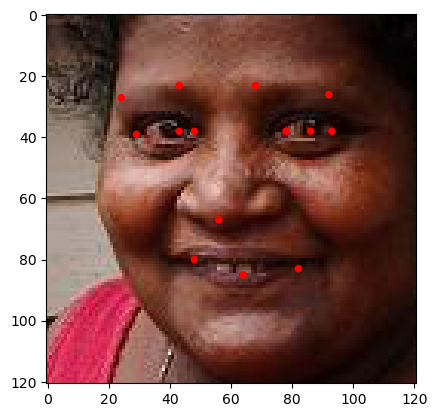

<Figure size 640x480 with 0 Axes>

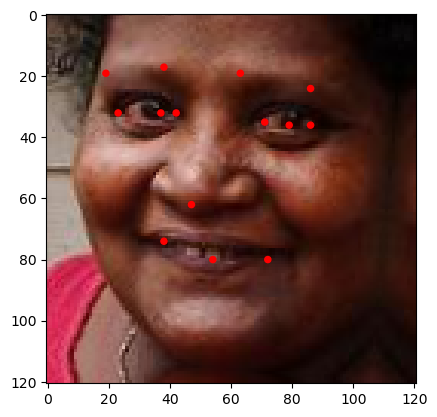

In [901]:
i = 4565
img = plt.imread(images + filenames[i])

plt.figure()
fig, ax = plt.subplots()
plt.imshow(img)
plotfeatures(ax, feat_list[i])

#print(feat_list[i])
#print(img.shape)
xform = transfor(image = img, keypoints = feat_list[i])
xform_img = xform['image']
xform_keypoints = xform['keypoints']
#print(xform_keypoints)

plt.figure()
fig, ax = plt.subplots()
plt.imshow(xform_img)
plotfeatures(ax, xform_keypoints)


#### As we can see in above figures, with transforming the image, the location of figure has also changed. This is due to the albumentation in Pytorch

In [902]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.optim as optim

In [903]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

seed = 40
np.random.seed(seed)
torch.manual_seed(seed)

In [904]:
datax = torch.from_numpy(X).to(device)
datay = torch.from_numpy(Y).to(device)
data = TensorDataset(datax, datay)

In [905]:
# splitting the data into test and train
train_split = 0.8
valid_split = 0.2


# here, testdata = 0.2 * total
#traindata = 0.8 * total, but it is further divided into traindataset and validdata, so traindataset = 0.8 * traindata

samples = len(data)
samples_train = int(train_split*samples) # totalsamples * 0.8
samples_test = samples - samples_train   # total - samples_train
samples_traindata = int(samples_train*(1-valid_split))  # this is totalsamples * 0.8 * 0.8
samples_valid = samples_train - samples_traindata 

train_dataset, test_data = random_split(data, [samples_train, samples_test])
train_data, valid_data = random_split(train_dataset, [samples_traindata, samples_valid])

len(train_data), len(valid_data), len(test_data)

(3840, 960, 1200)

In [906]:
train_data[:][0].shape

torch.Size([3840, 56, 56, 3])

#### There are a total of 3840 training samples, 960 validation samples and 1200 of test samples

In [907]:
batch_size = 128
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)

In [908]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from  torchsummary import summary

class Facial_detection(nn.Module):
    def __init__(self, dropout_prob = 0.5):
        super(Facial_detection, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 56, kernel_size = (3,3), padding = (1,1))  # 3*56*56 to 56*56*56
        self.relu1 = nn.ReLU()
        self.maxp1 = nn.MaxPool2d(kernel_size = (2,2), stride = 2)  # 56*56*56 to 56*28*28

        self.conv2 = nn.Conv2d(in_channels = 56, out_channels = 112, kernel_size = (3,3), padding = (1,1)) # 56*28*28 to 112*28*28
        self.relu2 = nn.ReLU()
        self.maxp2 = nn.MaxPool2d(kernel_size = (2,2), stride = 2)  # 112*28*28 to 112*14*14

        self.conv3 = nn.Conv2d(in_channels = 112, out_channels = 224, kernel_size = (3,3), padding = (1,1)) # 112*14*14 to 224*14*14
        self.relu3 = nn.ReLU()
        self.maxp3 = nn.MaxPool2d(kernel_size = (2,2), stride = 2)  # 224*14*14 to 224*7*7

        self.flat = nn.Flatten()
        self.fc = nn.Linear(in_features = (224*7*7), out_features = 100)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p = 0.5)

        self.fc2 = nn.Linear(in_features = 100, out_features = 14 * 2)
        

    def forward(self,x):
        L1 = self.maxp1(self.relu1(self.conv1(x)))
        L2 = self.maxp2(self.relu2(self.conv2(L1)))
        L3 = self.maxp3(self.relu3(self.conv3(L2)))
        L4 = self.relu4(self.fc(self.flat(L3)))
        L5 = self.dropout(L4)

        out = (self.fc2(L5))
        
        out = out.view(out.size(0), 14, 2)

        return out



In [909]:
model = Facial_detection(dropout_prob = 0.5)
model = model.float()
model  = model.to(device)
print(model)

Facial_detection(
  (conv1): Conv2d(3, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxp1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(56, 112, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxp2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(112, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (maxp3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=10976, out_features=100, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=100, out_features=28, bias=True)
)


In [910]:
summary(model, (3,56,56))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 56, 56, 56]           1,568
              ReLU-2           [-1, 56, 56, 56]               0
         MaxPool2d-3           [-1, 56, 28, 28]               0
            Conv2d-4          [-1, 112, 28, 28]          56,560
              ReLU-5          [-1, 112, 28, 28]               0
         MaxPool2d-6          [-1, 112, 14, 14]               0
            Conv2d-7          [-1, 224, 14, 14]         226,016
              ReLU-8          [-1, 224, 14, 14]               0
         MaxPool2d-9            [-1, 224, 7, 7]               0
          Flatten-10                [-1, 10976]               0
           Linear-11                  [-1, 100]       1,097,700
             ReLU-12                  [-1, 100]               0
          Dropout-13                  [-1, 100]               0
           Linear-14                   

#### I have used the horizontal flip for the augmentation.

In [947]:
import albumentations as A
from albumentations.pytorch import ToTensorV2


transfor = A.Compose([
    A.HorizontalFlip(),
   # A.Rotate(limit = 5, p = 1),
     ToTensorV2(),
    ],
    keypoint_params=A.KeypointParams(format='xy'))

### The clip and round keypoints is done in order to limit the position of the augmented images with the boundary

In [948]:
def clip_and_round_keypoints(keypoints, image_width, image_height):
    clipped_and_rounded_keypoints = []
    for x, y, *rest in keypoints:
        x = max(0, min(round(x), image_width - 1))
        y = max(0, min(round(y), image_height - 1))
        clipped_and_rounded_keypoints.append([x, y, *rest])
    return clipped_and_rounded_keypoints

In [949]:
import torch

def augmentation_total(X, Y):
    augmented_images = []
    augmented_keypoints = []

    m, pairs = Y.shape
    feat_list = Y.reshape(m, pairs // 2, 2).tolist()

    X = X.numpy()

    for i in range(128):
        clipped_and_rounded_keypoints = clip_and_round_keypoints(feat_list[i], 56, 56)
        xform = transfor(image=X[i], keypoints=clipped_and_rounded_keypoints)

        xform_img = xform['image']
        xform_keypoints = xform['keypoints']

        augmented_images.append(xform_img)
        augmented_keypoints.append(xform_keypoints)

    augmented_images = torch.stack(augmented_images)  
    Yt = torch.Tensor(augmented_keypoints)  

    return augmented_images, Yt


In [950]:
def train(dataloader, model, loss_fn, optimizer):

    num_batches = len(dataloader)
    loss_t = 0
    model.train()

    for batch, (X,Y) in enumerate(dataloader):
        
        X = X.float().to(device)
        Y = Y.float().to(device)
      
        
        X_total, Y_total = augmentation_total(X, Y)
       
        
        Yhat = model(X_total)
        
        loss = loss_fn(Yhat, Y_total)
        loss_t += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"batch: {batch+1:>5d}/{num_batches},"
          f"Avg_loss: {loss_t/(batch+1):>7f},")
          #f"{metric_name}: {metric(Yhat,Y):5f}\n", end='\r')

    return loss_t

In [951]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    with torch.no_grad():
        for X, Y in dataloader:
            X,Y = X.float().to(device), Y.to(device)
            X = torch.permute(X, (0,3,2,1))
            Yhat = model(X)
            m, pairs = Y.shape
            Y = Y.reshape(m, pairs // 2, 2)
            #print(Yhat.shape)
            #print(Y.shape)
            test_loss += loss_fn(Yhat, Y).item()
            #metric_T += metric(Yhat, Y)* len(Y)
    test_loss /= num_batches
    #metric_T /= size
    print(f"loss: {test_loss:>7f}")
    
    return Yhat


In [956]:
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-5)
loss_fn = nn.L1Loss()

epochs = 20
for t in range(epochs):
    print(f"\nEpoch {t+1}")
    train(train_loader, model, loss_fn, optimizer)
    print('Validation:')
    valid_Y = test (valid_loader, model, loss_fn)
print('\nTesting:')
test_Y = test (test_loader, model, loss_fn)
print("Done!")


Epoch 1
batch:    30/30,Avg_loss: 7.676228,
Validation:
loss: 6.930833

Epoch 2
batch:    30/30,Avg_loss: 6.766656,
Validation:
loss: 7.041230

Epoch 3
batch:    30/30,Avg_loss: 6.452805,
Validation:
loss: 7.119755

Epoch 4
batch:    30/30,Avg_loss: 6.317386,
Validation:
loss: 6.302869

Epoch 5
batch:    30/30,Avg_loss: 6.231299,
Validation:
loss: 6.100963

Epoch 6
batch:    30/30,Avg_loss: 6.166521,
Validation:
loss: 6.261534

Epoch 7
batch:    30/30,Avg_loss: 6.164027,
Validation:
loss: 6.266469

Epoch 8
batch:    30/30,Avg_loss: 6.126162,
Validation:
loss: 6.682374

Epoch 9
batch:    30/30,Avg_loss: 6.164663,
Validation:
loss: 6.491941

Epoch 10
batch:    30/30,Avg_loss: 6.109641,
Validation:
loss: 6.182007

Epoch 11
batch:    30/30,Avg_loss: 6.223731,
Validation:
loss: 6.851299

Epoch 12
batch:    30/30,Avg_loss: 6.114481,
Validation:
loss: 5.928749

Epoch 13
batch:    30/30,Avg_loss: 6.059587,
Validation:
loss: 6.709786

Epoch 14
batch:    30/30,Avg_loss: 6.101822,
Validation:
lo

#### We can see the loss is decreasing with the epochs.

### In order to test the effectiveness, I have taken the last image of the test loader, and plotted both the original and the predicted points in the image.

In [957]:
example1 = test_loader.dataset[-1][1]
example1 = example1.reshape( (14, 2))

In [958]:
pred1 = test_loader.dataset[-1][1]
pred1 = pred1.reshape((14,2))

<Figure size 640x480 with 0 Axes>

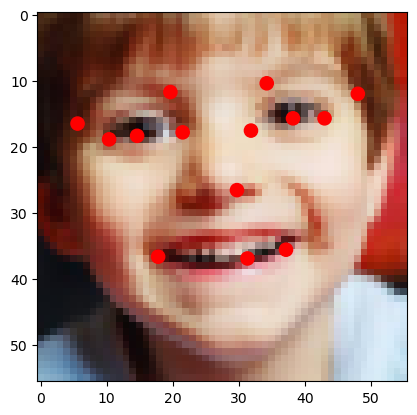

<Figure size 640x480 with 0 Axes>

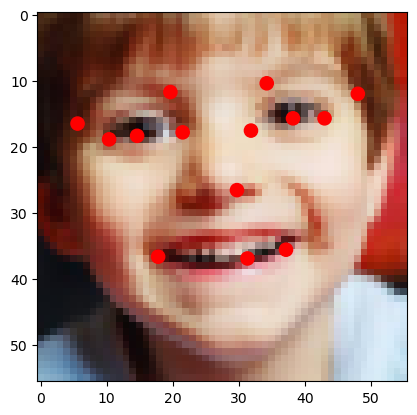

In [959]:

img = test_loader.dataset[-1][0]
plt.figure()
fig, ax = plt.subplots()
plt.imshow(img)
plotfeatures(ax, example1)



plt.figure()
fig, ax = plt.subplots()
plt.imshow(img)
plotfeatures(ax, pred1)
